## Produce age grids and spreading rate grids for use in `CO2_review_paper` notebooks


In [1]:
import gplately

import numpy as np
import pygplates
import glob, os
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import cartopy.crs as ccrs

import ptt

Two options: **1. manually point to a plate model** or **2. use gplately's `DataServer`**. Run one of the following two cells.

### Option one

In [2]:
# Plate model input directory
input_directory = "/Users/laurenilano/Downloads/SM2-Merdith_et_al_1_Ga_reconstruction_v1.1"

def definePlateReconstructionFiles(input_directory):
    rotation_filenames = glob.glob(os.path.join(input_directory, '*.rot'))
    rotation_model = pygplates.RotationModel(rotation_filenames)

    static_polygons = input_directory+"/shapes_static_polygons_Merdith_et_al.gpml"

    topology_filenames = [
        input_directory+"/250-0_plate_boundaries_Merdith_et_al.gpml",
        input_directory+"/410-250_plate_boundaries_Merdith_et_al.gpml",
        input_directory+"/1000-410-Convergence_Merdith_et_al.gpml",
        input_directory+"/1000-410-Divergence_Merdith_et_al.gpml",
        input_directory+"/1000-410-Topologies_Merdith_et_al.gpml",
        input_directory+"/1000-410-Transforms_Merdith_et_al.gpml"
    ]
    
    topology_features = pygplates.FeatureCollection()
    for topology_filename in topology_filenames:
        topology_features.add( pygplates.FeatureCollection(topology_filename) )
        
    return rotation_model, topology_features, static_polygons

# Rotation model, topologies and static polygons
rotation_model, topology_features, static_polygons = definePlateReconstructionFiles(input_directory)


# Continents
continents = input_directory+"/shapes_continents_Merdith_et_al.gpml"

### Option two

In [ ]:
gdownload = gplately.download.DataServer("Merdith2021")
rotation_model, topology_features, static_polygons = gdownload.get_plate_reconstruction_files()

coastlines, continents, COBs = gdownload.get_topology_geometries()

### Define the `PlateReconstruction` and `PlotTopologies` objects

In [3]:
model = gplately.PlateReconstruction(rotation_model, topology_features, static_polygons)

# This initial time can be any time - this is just to have a placeholder time to resolve topologies and continents to. 
time = 0
gplot = gplately.plot.PlotTopologies(model, time, continent_filename=continents, coastline_filename=coastlines)

### Define the `SeafloorGrid` object
See the SeafloorGrid [sample notebook](https://github.com/GPlates/gplately/blob/seafloorgrids/Notebooks/10-SeafloorGrids.ipynb) for more information about the following input parameters.

In [11]:
seafloorgrid = gplately.oceans.SeafloorGrid(
    model, 
    gplot, 
    
    max_time = 1000.,
    min_time = 0.,
    
    # The delta time for gridding
    ridge_time_step = 1.,
    
    # In degrees, the spacing between points tessellated along a ridge. A smaller value is a finer ridge.
    ridge_sampling = 0.5,
    
    # The degree spacing for the final regular grids
    spacing_degrees = 0.25,
    
    # MAKE SURE THIS DIRECTORY EXISTS ALREADY! This is a folder where all gridding files are saved 
    save_directory = "/Volumes/Lauren 1TB/AgeGridding/Dec6",
    
    # A string to help name files according to a plate model.
    file_collection = "Merdith2021",
    
    # An integer whose magnitude is proportional to the fineness of the global mesh
    refinement_levels = 6,
    
    # An initial spreading rate to kickstart the recursive gridding process. 
    initial_ocean_mean_spreading_rate = 75.,
    
    # Set to True to activate gridding checkpointing if this notebook is interrupted.
    resume_from_checkpoints = False,
    
    # So far, this does not need to be changes
    zval_names = ['SPREADING_RATE']
)

This line must run in full.

In [12]:
seafloorgrid.reconstruct_by_topologies()

Preparing all initial files...
Finished building initial_ocean_seed_points!
Finished building a continental mask at 1000.0 Ma!
Finished building a continental mask at 999.0 Ma!
Finished building a continental mask at 998.0 Ma!
Finished building a continental mask at 997.0 Ma!
Finished building a continental mask at 996.0 Ma!
Finished building a continental mask at 995.0 Ma!
Finished building a continental mask at 994.0 Ma!
Finished building a continental mask at 993.0 Ma!
Finished building a continental mask at 992.0 Ma!
Finished building a continental mask at 991.0 Ma!
Finished building a continental mask at 990.0 Ma!
Finished building a continental mask at 989.0 Ma!
Finished building a continental mask at 988.0 Ma!
Finished building a continental mask at 987.0 Ma!
Finished building a continental mask at 986.0 Ma!
Finished building a continental mask at 985.0 Ma!
Finished building a continental mask at 984.0 Ma!
Finished building a continental mask at 983.0 Ma!
Finished building a con

Finished building a continental mask at 837.0 Ma!
Finished building a continental mask at 836.0 Ma!
Finished building a continental mask at 835.0 Ma!
Finished building a continental mask at 834.0 Ma!
Finished building a continental mask at 833.0 Ma!
Finished building a continental mask at 832.0 Ma!
Finished building a continental mask at 831.0 Ma!
Finished building a continental mask at 830.0 Ma!
Finished building a continental mask at 829.0 Ma!
Finished building a continental mask at 828.0 Ma!
Finished building a continental mask at 827.0 Ma!
Finished building a continental mask at 826.0 Ma!
Finished building a continental mask at 825.0 Ma!
Finished building a continental mask at 824.0 Ma!
Finished building a continental mask at 823.0 Ma!
Finished building a continental mask at 822.0 Ma!
Finished building a continental mask at 821.0 Ma!
Finished building a continental mask at 820.0 Ma!
Finished building a continental mask at 819.0 Ma!
Finished building a continental mask at 818.0 Ma!


Finished building a continental mask at 673.0 Ma!
Finished building a continental mask at 672.0 Ma!
Finished building a continental mask at 671.0 Ma!
Finished building a continental mask at 670.0 Ma!
Finished building a continental mask at 669.0 Ma!
Finished building a continental mask at 668.0 Ma!
Finished building a continental mask at 667.0 Ma!
Finished building a continental mask at 666.0 Ma!
Finished building a continental mask at 665.0 Ma!
Finished building a continental mask at 664.0 Ma!
Finished building a continental mask at 663.0 Ma!
Finished building a continental mask at 662.0 Ma!
Finished building a continental mask at 661.0 Ma!
Finished building a continental mask at 660.0 Ma!
Finished building a continental mask at 659.0 Ma!
Finished building a continental mask at 658.0 Ma!
Finished building a continental mask at 657.0 Ma!
Finished building a continental mask at 656.0 Ma!
Finished building a continental mask at 655.0 Ma!
Finished building a continental mask at 654.0 Ma!


Finished building a continental mask at 509.0 Ma!
Finished building a continental mask at 508.0 Ma!
Finished building a continental mask at 507.0 Ma!
Finished building a continental mask at 506.0 Ma!
Finished building a continental mask at 505.0 Ma!
Finished building a continental mask at 504.0 Ma!
Finished building a continental mask at 503.0 Ma!
Finished building a continental mask at 502.0 Ma!
Finished building a continental mask at 501.0 Ma!
Finished building a continental mask at 500.0 Ma!
Finished building a continental mask at 499.0 Ma!
Finished building a continental mask at 498.0 Ma!
Finished building a continental mask at 497.0 Ma!
Finished building a continental mask at 496.0 Ma!
Finished building a continental mask at 495.0 Ma!
Finished building a continental mask at 494.0 Ma!
Finished building a continental mask at 493.0 Ma!
Finished building a continental mask at 492.0 Ma!
Finished building a continental mask at 491.0 Ma!
Finished building a continental mask at 490.0 Ma!


Finished building a continental mask at 345.0 Ma!
Finished building a continental mask at 344.0 Ma!
Finished building a continental mask at 343.0 Ma!
Finished building a continental mask at 342.0 Ma!
Finished building a continental mask at 341.0 Ma!
Finished building a continental mask at 340.0 Ma!
Finished building a continental mask at 339.0 Ma!
Finished building a continental mask at 338.0 Ma!
Finished building a continental mask at 337.0 Ma!
Finished building a continental mask at 336.0 Ma!
Finished building a continental mask at 335.0 Ma!
Finished building a continental mask at 334.0 Ma!
Finished building a continental mask at 333.0 Ma!
Finished building a continental mask at 332.0 Ma!
Finished building a continental mask at 331.0 Ma!
Finished building a continental mask at 330.0 Ma!
Finished building a continental mask at 329.0 Ma!
Finished building a continental mask at 328.0 Ma!
Finished building a continental mask at 327.0 Ma!
Finished building a continental mask at 326.0 Ma!


Finished building a continental mask at 181.0 Ma!
Finished building a continental mask at 180.0 Ma!
Finished building a continental mask at 179.0 Ma!
Finished building a continental mask at 178.0 Ma!
Finished building a continental mask at 177.0 Ma!
Finished building a continental mask at 176.0 Ma!
Finished building a continental mask at 175.0 Ma!
Finished building a continental mask at 174.0 Ma!
Finished building a continental mask at 173.0 Ma!
Finished building a continental mask at 172.0 Ma!
Finished building a continental mask at 171.0 Ma!
Finished building a continental mask at 170.0 Ma!
Finished building a continental mask at 169.0 Ma!
Finished building a continental mask at 168.0 Ma!
Finished building a continental mask at 167.0 Ma!
Finished building a continental mask at 166.0 Ma!
Finished building a continental mask at 165.0 Ma!
Finished building a continental mask at 164.0 Ma!
Finished building a continental mask at 163.0 Ma!
Finished building a continental mask at 162.0 Ma!


Finished building a continental mask at 15.0 Ma!
Finished building a continental mask at 14.0 Ma!
Finished building a continental mask at 13.0 Ma!
Finished building a continental mask at 12.0 Ma!
Finished building a continental mask at 11.0 Ma!
Finished building a continental mask at 10.0 Ma!
Finished building a continental mask at 9.0 Ma!
Finished building a continental mask at 8.0 Ma!
Finished building a continental mask at 7.0 Ma!
Finished building a continental mask at 6.0 Ma!
Finished building a continental mask at 5.0 Ma!
Finished building a continental mask at 4.0 Ma!
Finished building a continental mask at 3.0 Ma!
Finished building a continental mask at 2.0 Ma!
Finished building a continental mask at 1.0 Ma!
Finished building a continental mask at 0.0 Ma!
Finished building MOR seedpoints at 1000.0 Ma!
Finished building MOR seedpoints at 999.0 Ma!
Finished building MOR seedpoints at 998.0 Ma!
Finished building MOR seedpoints at 997.0 Ma!
Finished building MOR seedpoints at 996.0

Finished building MOR seedpoints at 837.0 Ma!
Finished building MOR seedpoints at 836.0 Ma!
Finished building MOR seedpoints at 835.0 Ma!
Finished building MOR seedpoints at 834.0 Ma!
Finished building MOR seedpoints at 833.0 Ma!
Finished building MOR seedpoints at 832.0 Ma!
Finished building MOR seedpoints at 831.0 Ma!
Finished building MOR seedpoints at 830.0 Ma!
Finished building MOR seedpoints at 829.0 Ma!
Finished building MOR seedpoints at 828.0 Ma!
Finished building MOR seedpoints at 827.0 Ma!
Finished building MOR seedpoints at 826.0 Ma!
Finished building MOR seedpoints at 825.0 Ma!
Finished building MOR seedpoints at 824.0 Ma!
Finished building MOR seedpoints at 823.0 Ma!
Finished building MOR seedpoints at 822.0 Ma!
Finished building MOR seedpoints at 821.0 Ma!
Finished building MOR seedpoints at 820.0 Ma!
Finished building MOR seedpoints at 819.0 Ma!
Finished building MOR seedpoints at 818.0 Ma!
Finished building MOR seedpoints at 817.0 Ma!
Finished building MOR seedpoints a

Finished building MOR seedpoints at 658.0 Ma!
Finished building MOR seedpoints at 657.0 Ma!
Finished building MOR seedpoints at 656.0 Ma!
Finished building MOR seedpoints at 655.0 Ma!
Finished building MOR seedpoints at 654.0 Ma!
Finished building MOR seedpoints at 653.0 Ma!
Finished building MOR seedpoints at 652.0 Ma!
Finished building MOR seedpoints at 651.0 Ma!
Finished building MOR seedpoints at 650.0 Ma!
Finished building MOR seedpoints at 649.0 Ma!
Finished building MOR seedpoints at 648.0 Ma!
Finished building MOR seedpoints at 647.0 Ma!
Finished building MOR seedpoints at 646.0 Ma!
Finished building MOR seedpoints at 645.0 Ma!
Finished building MOR seedpoints at 644.0 Ma!
Finished building MOR seedpoints at 643.0 Ma!
Finished building MOR seedpoints at 642.0 Ma!
Finished building MOR seedpoints at 641.0 Ma!
Finished building MOR seedpoints at 640.0 Ma!
Finished building MOR seedpoints at 639.0 Ma!
Finished building MOR seedpoints at 638.0 Ma!
Finished building MOR seedpoints a

Finished building MOR seedpoints at 479.0 Ma!
Finished building MOR seedpoints at 478.0 Ma!
Finished building MOR seedpoints at 477.0 Ma!
Finished building MOR seedpoints at 476.0 Ma!
Finished building MOR seedpoints at 475.0 Ma!
Finished building MOR seedpoints at 474.0 Ma!
Finished building MOR seedpoints at 473.0 Ma!
Finished building MOR seedpoints at 472.0 Ma!
Finished building MOR seedpoints at 471.0 Ma!
Finished building MOR seedpoints at 470.0 Ma!
Finished building MOR seedpoints at 469.0 Ma!
Finished building MOR seedpoints at 468.0 Ma!
Finished building MOR seedpoints at 467.0 Ma!
Finished building MOR seedpoints at 466.0 Ma!
Finished building MOR seedpoints at 465.0 Ma!
Finished building MOR seedpoints at 464.0 Ma!
Finished building MOR seedpoints at 463.0 Ma!
Finished building MOR seedpoints at 462.0 Ma!
Finished building MOR seedpoints at 461.0 Ma!
Finished building MOR seedpoints at 460.0 Ma!
Finished building MOR seedpoints at 459.0 Ma!
Finished building MOR seedpoints a

Finished building MOR seedpoints at 299.0 Ma!
Finished building MOR seedpoints at 298.0 Ma!
Finished building MOR seedpoints at 297.0 Ma!
Finished building MOR seedpoints at 296.0 Ma!
Finished building MOR seedpoints at 295.0 Ma!
Finished building MOR seedpoints at 294.0 Ma!
Finished building MOR seedpoints at 293.0 Ma!
Finished building MOR seedpoints at 292.0 Ma!
Finished building MOR seedpoints at 291.0 Ma!
Finished building MOR seedpoints at 290.0 Ma!
Finished building MOR seedpoints at 289.0 Ma!
Finished building MOR seedpoints at 288.0 Ma!
Finished building MOR seedpoints at 287.0 Ma!
Finished building MOR seedpoints at 286.0 Ma!
Finished building MOR seedpoints at 285.0 Ma!
Finished building MOR seedpoints at 284.0 Ma!
Finished building MOR seedpoints at 283.0 Ma!
Finished building MOR seedpoints at 282.0 Ma!
Finished building MOR seedpoints at 281.0 Ma!
Finished building MOR seedpoints at 280.0 Ma!
Finished building MOR seedpoints at 279.0 Ma!
Finished building MOR seedpoints a

Finished building MOR seedpoints at 120.0 Ma!
Finished building MOR seedpoints at 119.0 Ma!
Finished building MOR seedpoints at 118.0 Ma!
Finished building MOR seedpoints at 117.0 Ma!
Finished building MOR seedpoints at 116.0 Ma!
Finished building MOR seedpoints at 115.0 Ma!
Finished building MOR seedpoints at 114.0 Ma!
Finished building MOR seedpoints at 113.0 Ma!
Finished building MOR seedpoints at 112.0 Ma!
Finished building MOR seedpoints at 111.0 Ma!
Finished building MOR seedpoints at 110.0 Ma!
Finished building MOR seedpoints at 109.0 Ma!
Finished building MOR seedpoints at 108.0 Ma!
Finished building MOR seedpoints at 107.0 Ma!
Finished building MOR seedpoints at 106.0 Ma!
Finished building MOR seedpoints at 105.0 Ma!
Finished building MOR seedpoints at 104.0 Ma!
Finished building MOR seedpoints at 103.0 Ma!
Finished building MOR seedpoints at 102.0 Ma!
Finished building MOR seedpoints at 101.0 Ma!
Finished building MOR seedpoints at 100.0 Ma!
Finished building MOR seedpoints a

Reconstruct by topologies: working on time 982.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_981.0Ma.nc
Reconstruct by topologies: working on time 981.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_980.0Ma.nc
Reconstruct by topologies: working on time 980.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_979.0Ma.nc
Reconstruct by topologies: working on time 979.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_978.0Ma.nc
Reconstruct by topologies: working on time 978.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_977.0Ma.nc
Reconstruct by topologies: working on time 977.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_976.0Ma.nc
Reconstruct by topologies: working on time 976.00 Ma
Points mask

Reconstruct by topologies: working on time 929.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_928.0Ma.nc
Reconstruct by topologies: working on time 928.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_927.0Ma.nc
Reconstruct by topologies: working on time 927.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_926.0Ma.nc
Reconstruct by topologies: working on time 926.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_925.0Ma.nc
Reconstruct by topologies: working on time 925.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_924.0Ma.nc
Reconstruct by topologies: working on time 924.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_923.0Ma.nc
Reconstruct by topologies: working on time 923.00 Ma
Points mask

Reconstruct by topologies: working on time 876.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_875.0Ma.nc
Reconstruct by topologies: working on time 875.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_874.0Ma.nc
Reconstruct by topologies: working on time 874.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_873.0Ma.nc
Reconstruct by topologies: working on time 873.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_872.0Ma.nc
Reconstruct by topologies: working on time 872.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_871.0Ma.nc
Reconstruct by topologies: working on time 871.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_870.0Ma.nc
Reconstruct by topologies: working on time 870.00 Ma
Points mask

Reconstruct by topologies: working on time 823.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_822.0Ma.nc
Reconstruct by topologies: working on time 822.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_821.0Ma.nc
Reconstruct by topologies: working on time 821.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_820.0Ma.nc
Reconstruct by topologies: working on time 820.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_819.0Ma.nc
Reconstruct by topologies: working on time 819.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_818.0Ma.nc
Reconstruct by topologies: working on time 818.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_817.0Ma.nc
Reconstruct by topologies: working on time 817.00 Ma
Points mask

Reconstruct by topologies: working on time 770.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_769.0Ma.nc
Reconstruct by topologies: working on time 769.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_768.0Ma.nc
Reconstruct by topologies: working on time 768.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_767.0Ma.nc
Reconstruct by topologies: working on time 767.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_766.0Ma.nc
Reconstruct by topologies: working on time 766.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_765.0Ma.nc
Reconstruct by topologies: working on time 765.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_764.0Ma.nc
Reconstruct by topologies: working on time 764.00 Ma
Points mask

Reconstruct by topologies: working on time 717.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_716.0Ma.nc
Reconstruct by topologies: working on time 716.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_715.0Ma.nc
Reconstruct by topologies: working on time 715.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_714.0Ma.nc
Reconstruct by topologies: working on time 714.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_713.0Ma.nc
Reconstruct by topologies: working on time 713.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_712.0Ma.nc
Reconstruct by topologies: working on time 712.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_711.0Ma.nc
Reconstruct by topologies: working on time 711.00 Ma
Points mask

Reconstruct by topologies: working on time 664.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_663.0Ma.nc
Reconstruct by topologies: working on time 663.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_662.0Ma.nc
Reconstruct by topologies: working on time 662.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_661.0Ma.nc
Reconstruct by topologies: working on time 661.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_660.0Ma.nc
Reconstruct by topologies: working on time 660.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_659.0Ma.nc
Reconstruct by topologies: working on time 659.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_658.0Ma.nc
Reconstruct by topologies: working on time 658.00 Ma
Points mask

Reconstruct by topologies: working on time 611.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_610.0Ma.nc
Reconstruct by topologies: working on time 610.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_609.0Ma.nc
Reconstruct by topologies: working on time 609.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_608.0Ma.nc
Reconstruct by topologies: working on time 608.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_607.0Ma.nc
Reconstruct by topologies: working on time 607.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_606.0Ma.nc
Reconstruct by topologies: working on time 606.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_605.0Ma.nc
Reconstruct by topologies: working on time 605.00 Ma
Points mask

Reconstruct by topologies: working on time 558.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_557.0Ma.nc
Reconstruct by topologies: working on time 557.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_556.0Ma.nc
Reconstruct by topologies: working on time 556.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_555.0Ma.nc
Reconstruct by topologies: working on time 555.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_554.0Ma.nc
Reconstruct by topologies: working on time 554.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_553.0Ma.nc
Reconstruct by topologies: working on time 553.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_552.0Ma.nc
Reconstruct by topologies: working on time 552.00 Ma
Points mask

Reconstruct by topologies: working on time 505.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_504.0Ma.nc
Reconstruct by topologies: working on time 504.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_503.0Ma.nc
Reconstruct by topologies: working on time 503.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_502.0Ma.nc
Reconstruct by topologies: working on time 502.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_501.0Ma.nc
Reconstruct by topologies: working on time 501.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_500.0Ma.nc
Reconstruct by topologies: working on time 500.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_499.0Ma.nc
Reconstruct by topologies: working on time 499.00 Ma
Points mask

Reconstruct by topologies: working on time 452.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_451.0Ma.nc
Reconstruct by topologies: working on time 451.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_450.0Ma.nc
Reconstruct by topologies: working on time 450.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_449.0Ma.nc
Reconstruct by topologies: working on time 449.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_448.0Ma.nc
Reconstruct by topologies: working on time 448.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_447.0Ma.nc
Reconstruct by topologies: working on time 447.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_446.0Ma.nc
Reconstruct by topologies: working on time 446.00 Ma
Points mask

Reconstruct by topologies: working on time 399.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_398.0Ma.nc
Reconstruct by topologies: working on time 398.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_397.0Ma.nc
Reconstruct by topologies: working on time 397.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_396.0Ma.nc
Reconstruct by topologies: working on time 396.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_395.0Ma.nc
Reconstruct by topologies: working on time 395.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_394.0Ma.nc
Reconstruct by topologies: working on time 394.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_393.0Ma.nc
Reconstruct by topologies: working on time 393.00 Ma
Points mask

Reconstruct by topologies: working on time 346.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_345.0Ma.nc
Reconstruct by topologies: working on time 345.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_344.0Ma.nc
Reconstruct by topologies: working on time 344.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_343.0Ma.nc
Reconstruct by topologies: working on time 343.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_342.0Ma.nc
Reconstruct by topologies: working on time 342.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_341.0Ma.nc
Reconstruct by topologies: working on time 341.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_340.0Ma.nc
Reconstruct by topologies: working on time 340.00 Ma
Points mask

Reconstruct by topologies: working on time 293.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_292.0Ma.nc
Reconstruct by topologies: working on time 292.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_291.0Ma.nc
Reconstruct by topologies: working on time 291.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_290.0Ma.nc
Reconstruct by topologies: working on time 290.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_289.0Ma.nc
Reconstruct by topologies: working on time 289.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_288.0Ma.nc
Reconstruct by topologies: working on time 288.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_287.0Ma.nc
Reconstruct by topologies: working on time 287.00 Ma
Points mask

Reconstruct by topologies: working on time 240.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_239.0Ma.nc
Reconstruct by topologies: working on time 239.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_238.0Ma.nc
Reconstruct by topologies: working on time 238.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_237.0Ma.nc
Reconstruct by topologies: working on time 237.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_236.0Ma.nc
Reconstruct by topologies: working on time 236.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_235.0Ma.nc
Reconstruct by topologies: working on time 235.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_234.0Ma.nc
Reconstruct by topologies: working on time 234.00 Ma
Points mask

Reconstruct by topologies: working on time 187.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_186.0Ma.nc
Reconstruct by topologies: working on time 186.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_185.0Ma.nc
Reconstruct by topologies: working on time 185.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_184.0Ma.nc
Reconstruct by topologies: working on time 184.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_183.0Ma.nc
Reconstruct by topologies: working on time 183.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_182.0Ma.nc
Reconstruct by topologies: working on time 182.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_181.0Ma.nc
Reconstruct by topologies: working on time 181.00 Ma
Points mask

Reconstruct by topologies: working on time 134.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_133.0Ma.nc
Reconstruct by topologies: working on time 133.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_132.0Ma.nc
Reconstruct by topologies: working on time 132.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_131.0Ma.nc
Reconstruct by topologies: working on time 131.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_130.0Ma.nc
Reconstruct by topologies: working on time 130.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_129.0Ma.nc
Reconstruct by topologies: working on time 129.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_128.0Ma.nc
Reconstruct by topologies: working on time 128.00 Ma
Points mask

Reconstruct by topologies: working on time 81.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_80.0Ma.nc
Reconstruct by topologies: working on time 80.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_79.0Ma.nc
Reconstruct by topologies: working on time 79.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_78.0Ma.nc
Reconstruct by topologies: working on time 78.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_77.0Ma.nc
Reconstruct by topologies: working on time 77.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_76.0Ma.nc
Reconstruct by topologies: working on time 76.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_75.0Ma.nc
Reconstruct by topologies: working on time 75.00 Ma
Points masked against gr

Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_27.0Ma.nc
Reconstruct by topologies: working on time 27.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_26.0Ma.nc
Reconstruct by topologies: working on time 26.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_25.0Ma.nc
Reconstruct by topologies: working on time 25.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_24.0Ma.nc
Reconstruct by topologies: working on time 24.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_23.0Ma.nc
Reconstruct by topologies: working on time 23.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021_continent_mask_22.0Ma.nc
Reconstruct by topologies: working on time 22.00 Ma
Points masked against grid: /Volumes/Lauren 1TB/AgeGridding/Dec6/Merdith2021

### Produce masked and unmasked age grids

In [13]:
seafloorgrid.lat_lon_z_to_netCDF(
    "SEAFLOOR_AGE", 
    unmasked=True,
    time_arr=seafloorgrid.time_array)

netCDF grids for 1000.0 Ma complete!
netCDF grids for 999.0 Ma complete!
netCDF grids for 998.0 Ma complete!
netCDF grids for 997.0 Ma complete!
netCDF grids for 996.0 Ma complete!
netCDF grids for 995.0 Ma complete!
netCDF grids for 994.0 Ma complete!
netCDF grids for 993.0 Ma complete!
netCDF grids for 992.0 Ma complete!
netCDF grids for 991.0 Ma complete!
netCDF grids for 990.0 Ma complete!
netCDF grids for 989.0 Ma complete!
netCDF grids for 988.0 Ma complete!
netCDF grids for 987.0 Ma complete!
netCDF grids for 986.0 Ma complete!
netCDF grids for 985.0 Ma complete!
netCDF grids for 984.0 Ma complete!
netCDF grids for 983.0 Ma complete!
netCDF grids for 982.0 Ma complete!
netCDF grids for 981.0 Ma complete!
netCDF grids for 980.0 Ma complete!
netCDF grids for 979.0 Ma complete!
netCDF grids for 978.0 Ma complete!
netCDF grids for 977.0 Ma complete!
netCDF grids for 976.0 Ma complete!
netCDF grids for 975.0 Ma complete!
netCDF grids for 974.0 Ma complete!
netCDF grids for 973.0 Ma c

netCDF grids for 772.0 Ma complete!
netCDF grids for 771.0 Ma complete!
netCDF grids for 770.0 Ma complete!
netCDF grids for 769.0 Ma complete!
netCDF grids for 768.0 Ma complete!
netCDF grids for 767.0 Ma complete!
netCDF grids for 766.0 Ma complete!
netCDF grids for 765.0 Ma complete!
netCDF grids for 764.0 Ma complete!
netCDF grids for 763.0 Ma complete!
netCDF grids for 762.0 Ma complete!
netCDF grids for 761.0 Ma complete!
netCDF grids for 760.0 Ma complete!
netCDF grids for 759.0 Ma complete!
netCDF grids for 758.0 Ma complete!
netCDF grids for 757.0 Ma complete!
netCDF grids for 756.0 Ma complete!
netCDF grids for 755.0 Ma complete!
netCDF grids for 754.0 Ma complete!
netCDF grids for 753.0 Ma complete!
netCDF grids for 752.0 Ma complete!
netCDF grids for 751.0 Ma complete!
netCDF grids for 750.0 Ma complete!
netCDF grids for 749.0 Ma complete!
netCDF grids for 748.0 Ma complete!
netCDF grids for 747.0 Ma complete!
netCDF grids for 746.0 Ma complete!
netCDF grids for 745.0 Ma co

netCDF grids for 544.0 Ma complete!
netCDF grids for 543.0 Ma complete!
netCDF grids for 542.0 Ma complete!
netCDF grids for 541.0 Ma complete!
netCDF grids for 540.0 Ma complete!
netCDF grids for 539.0 Ma complete!
netCDF grids for 538.0 Ma complete!
netCDF grids for 537.0 Ma complete!
netCDF grids for 536.0 Ma complete!
netCDF grids for 535.0 Ma complete!
netCDF grids for 534.0 Ma complete!
netCDF grids for 533.0 Ma complete!
netCDF grids for 532.0 Ma complete!
netCDF grids for 531.0 Ma complete!
netCDF grids for 530.0 Ma complete!
netCDF grids for 529.0 Ma complete!
netCDF grids for 528.0 Ma complete!
netCDF grids for 527.0 Ma complete!
netCDF grids for 526.0 Ma complete!
netCDF grids for 525.0 Ma complete!
netCDF grids for 524.0 Ma complete!
netCDF grids for 523.0 Ma complete!
netCDF grids for 522.0 Ma complete!
netCDF grids for 521.0 Ma complete!
netCDF grids for 520.0 Ma complete!
netCDF grids for 519.0 Ma complete!
netCDF grids for 518.0 Ma complete!
netCDF grids for 517.0 Ma co

netCDF grids for 316.0 Ma complete!
netCDF grids for 315.0 Ma complete!
netCDF grids for 314.0 Ma complete!
netCDF grids for 313.0 Ma complete!
netCDF grids for 312.0 Ma complete!
netCDF grids for 311.0 Ma complete!
netCDF grids for 310.0 Ma complete!
netCDF grids for 309.0 Ma complete!
netCDF grids for 308.0 Ma complete!
netCDF grids for 307.0 Ma complete!
netCDF grids for 306.0 Ma complete!
netCDF grids for 305.0 Ma complete!
netCDF grids for 304.0 Ma complete!
netCDF grids for 303.0 Ma complete!
netCDF grids for 302.0 Ma complete!
netCDF grids for 301.0 Ma complete!
netCDF grids for 300.0 Ma complete!
netCDF grids for 299.0 Ma complete!
netCDF grids for 298.0 Ma complete!
netCDF grids for 297.0 Ma complete!
netCDF grids for 296.0 Ma complete!
netCDF grids for 295.0 Ma complete!
netCDF grids for 294.0 Ma complete!
netCDF grids for 293.0 Ma complete!
netCDF grids for 292.0 Ma complete!
netCDF grids for 291.0 Ma complete!
netCDF grids for 290.0 Ma complete!
netCDF grids for 289.0 Ma co

netCDF grids for 88.0 Ma complete!
netCDF grids for 87.0 Ma complete!
netCDF grids for 86.0 Ma complete!
netCDF grids for 85.0 Ma complete!
netCDF grids for 84.0 Ma complete!
netCDF grids for 83.0 Ma complete!
netCDF grids for 82.0 Ma complete!
netCDF grids for 81.0 Ma complete!
netCDF grids for 80.0 Ma complete!
netCDF grids for 79.0 Ma complete!
netCDF grids for 78.0 Ma complete!
netCDF grids for 77.0 Ma complete!
netCDF grids for 76.0 Ma complete!
netCDF grids for 75.0 Ma complete!
netCDF grids for 74.0 Ma complete!
netCDF grids for 73.0 Ma complete!
netCDF grids for 72.0 Ma complete!
netCDF grids for 71.0 Ma complete!
netCDF grids for 70.0 Ma complete!
netCDF grids for 69.0 Ma complete!
netCDF grids for 68.0 Ma complete!
netCDF grids for 67.0 Ma complete!
netCDF grids for 66.0 Ma complete!
netCDF grids for 65.0 Ma complete!
netCDF grids for 64.0 Ma complete!
netCDF grids for 63.0 Ma complete!
netCDF grids for 62.0 Ma complete!
netCDF grids for 61.0 Ma complete!
netCDF grids for 60.

### Produce masked and unmasked spreading rate grids

In [14]:
seafloorgrid.lat_lon_z_to_netCDF(
    "SPREADING_RATE", 
    unmasked=True,
    time_arr=seafloorgrid.time_array)

netCDF grids for 1000.0 Ma complete!
netCDF grids for 999.0 Ma complete!
netCDF grids for 998.0 Ma complete!
netCDF grids for 997.0 Ma complete!
netCDF grids for 996.0 Ma complete!
netCDF grids for 995.0 Ma complete!
netCDF grids for 994.0 Ma complete!
netCDF grids for 993.0 Ma complete!
netCDF grids for 992.0 Ma complete!
netCDF grids for 991.0 Ma complete!
netCDF grids for 990.0 Ma complete!
netCDF grids for 989.0 Ma complete!
netCDF grids for 988.0 Ma complete!
netCDF grids for 987.0 Ma complete!
netCDF grids for 986.0 Ma complete!
netCDF grids for 985.0 Ma complete!
netCDF grids for 984.0 Ma complete!
netCDF grids for 983.0 Ma complete!
netCDF grids for 982.0 Ma complete!
netCDF grids for 981.0 Ma complete!
netCDF grids for 980.0 Ma complete!
netCDF grids for 979.0 Ma complete!
netCDF grids for 978.0 Ma complete!
netCDF grids for 977.0 Ma complete!
netCDF grids for 976.0 Ma complete!
netCDF grids for 975.0 Ma complete!
netCDF grids for 974.0 Ma complete!
netCDF grids for 973.0 Ma c

netCDF grids for 772.0 Ma complete!
netCDF grids for 771.0 Ma complete!
netCDF grids for 770.0 Ma complete!
netCDF grids for 769.0 Ma complete!
netCDF grids for 768.0 Ma complete!
netCDF grids for 767.0 Ma complete!
netCDF grids for 766.0 Ma complete!
netCDF grids for 765.0 Ma complete!
netCDF grids for 764.0 Ma complete!
netCDF grids for 763.0 Ma complete!
netCDF grids for 762.0 Ma complete!
netCDF grids for 761.0 Ma complete!
netCDF grids for 760.0 Ma complete!
netCDF grids for 759.0 Ma complete!
netCDF grids for 758.0 Ma complete!
netCDF grids for 757.0 Ma complete!
netCDF grids for 756.0 Ma complete!
netCDF grids for 755.0 Ma complete!
netCDF grids for 754.0 Ma complete!
netCDF grids for 753.0 Ma complete!
netCDF grids for 752.0 Ma complete!
netCDF grids for 751.0 Ma complete!
netCDF grids for 750.0 Ma complete!
netCDF grids for 749.0 Ma complete!
netCDF grids for 748.0 Ma complete!
netCDF grids for 747.0 Ma complete!
netCDF grids for 746.0 Ma complete!
netCDF grids for 745.0 Ma co

netCDF grids for 544.0 Ma complete!
netCDF grids for 543.0 Ma complete!
netCDF grids for 542.0 Ma complete!
netCDF grids for 541.0 Ma complete!
netCDF grids for 540.0 Ma complete!
netCDF grids for 539.0 Ma complete!
netCDF grids for 538.0 Ma complete!
netCDF grids for 537.0 Ma complete!
netCDF grids for 536.0 Ma complete!
netCDF grids for 535.0 Ma complete!
netCDF grids for 534.0 Ma complete!
netCDF grids for 533.0 Ma complete!
netCDF grids for 532.0 Ma complete!
netCDF grids for 531.0 Ma complete!
netCDF grids for 530.0 Ma complete!
netCDF grids for 529.0 Ma complete!
netCDF grids for 528.0 Ma complete!
netCDF grids for 527.0 Ma complete!
netCDF grids for 526.0 Ma complete!
netCDF grids for 525.0 Ma complete!
netCDF grids for 524.0 Ma complete!
netCDF grids for 523.0 Ma complete!
netCDF grids for 522.0 Ma complete!
netCDF grids for 521.0 Ma complete!
netCDF grids for 520.0 Ma complete!
netCDF grids for 519.0 Ma complete!
netCDF grids for 518.0 Ma complete!
netCDF grids for 517.0 Ma co

netCDF grids for 316.0 Ma complete!
netCDF grids for 315.0 Ma complete!
netCDF grids for 314.0 Ma complete!
netCDF grids for 313.0 Ma complete!
netCDF grids for 312.0 Ma complete!
netCDF grids for 311.0 Ma complete!
netCDF grids for 310.0 Ma complete!
netCDF grids for 309.0 Ma complete!
netCDF grids for 308.0 Ma complete!
netCDF grids for 307.0 Ma complete!
netCDF grids for 306.0 Ma complete!
netCDF grids for 305.0 Ma complete!
netCDF grids for 304.0 Ma complete!
netCDF grids for 303.0 Ma complete!
netCDF grids for 302.0 Ma complete!
netCDF grids for 301.0 Ma complete!
netCDF grids for 300.0 Ma complete!
netCDF grids for 299.0 Ma complete!
netCDF grids for 298.0 Ma complete!
netCDF grids for 297.0 Ma complete!
netCDF grids for 296.0 Ma complete!
netCDF grids for 295.0 Ma complete!
netCDF grids for 294.0 Ma complete!
netCDF grids for 293.0 Ma complete!
netCDF grids for 292.0 Ma complete!
netCDF grids for 291.0 Ma complete!
netCDF grids for 290.0 Ma complete!
netCDF grids for 289.0 Ma co

netCDF grids for 88.0 Ma complete!
netCDF grids for 87.0 Ma complete!
netCDF grids for 86.0 Ma complete!
netCDF grids for 85.0 Ma complete!
netCDF grids for 84.0 Ma complete!
netCDF grids for 83.0 Ma complete!
netCDF grids for 82.0 Ma complete!
netCDF grids for 81.0 Ma complete!
netCDF grids for 80.0 Ma complete!
netCDF grids for 79.0 Ma complete!
netCDF grids for 78.0 Ma complete!
netCDF grids for 77.0 Ma complete!
netCDF grids for 76.0 Ma complete!
netCDF grids for 75.0 Ma complete!
netCDF grids for 74.0 Ma complete!
netCDF grids for 73.0 Ma complete!
netCDF grids for 72.0 Ma complete!
netCDF grids for 71.0 Ma complete!
netCDF grids for 70.0 Ma complete!
netCDF grids for 69.0 Ma complete!
netCDF grids for 68.0 Ma complete!
netCDF grids for 67.0 Ma complete!
netCDF grids for 66.0 Ma complete!
netCDF grids for 65.0 Ma complete!
netCDF grids for 64.0 Ma complete!
netCDF grids for 63.0 Ma complete!
netCDF grids for 62.0 Ma complete!
netCDF grids for 61.0 Ma complete!
netCDF grids for 60.

### Plot some sample outputs

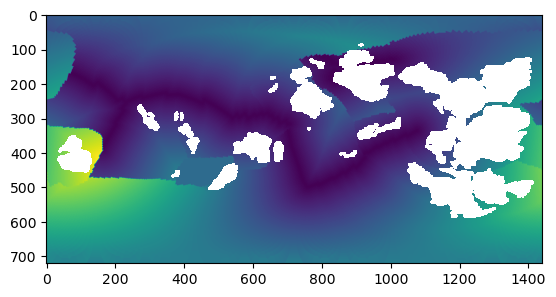

In [9]:
age_grid = "{}/{}_SEAFLOOR_AGE_grid_1000.0Ma.nc".format(save_directory, file_collection)
plt.imshow(
    gplately.Raster(filename=age_grid).data
)

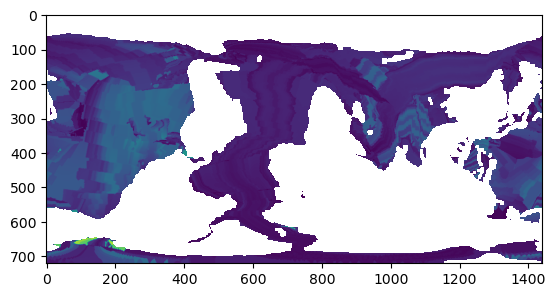

In [15]:
age_grid = "{}/{}_SPREADING_RATE_grid_1000.0Ma.nc".format(save_directory, file_collection)
plt.imshow(
    gplately.Raster(filename=age_grid).data
)